[-0.16637862  1.00214955]
rmse=0.12, R2=0.85, R22=0.61, clf.score=0.85
[ 0.00506341 -0.03063378  1.03485304]
rmse=0.10, R2=0.91, R22=0.69, clf.score=0.91
[ -6.67902239e-03  -2.24069831e+01   3.05403459e+03  -1.61704316e+05
   4.65102122e+06  -8.24077036e+07   9.60769290e+08  -7.65378575e+09
   4.24158429e+10  -1.63185512e+11   4.22015381e+11  -6.59884583e+11
   3.73269069e+11   5.98287425e+11  -1.03378785e+12  -2.05406291e+11
   1.14344206e+12   3.31781991e+11  -1.04625666e+12  -8.45804398e+11
   5.04378781e+11   1.21237223e+12   5.69535295e+11  -7.05389588e+11
  -1.24099733e+12  -6.58515220e+11   4.13948385e+11   1.18599857e+12
   1.00621087e+12   2.43723028e+11  -6.78486577e+11  -1.13852697e+12
  -1.02378861e+12  -2.81037471e+11   4.87723756e+11   1.06233440e+12
   1.11840279e+12   6.69498562e+11  -1.08553374e+10  -6.57491083e+11
  -1.07061176e+12  -1.03010191e+12  -6.77225446e+11  -1.19218780e+11
   4.85191835e+11   9.39224563e+11   1.07192975e+12   8.74863079e+11
   4.87141338e+11 

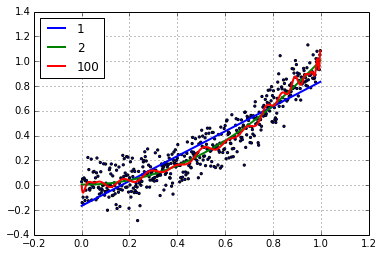

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt  
import numpy as np  
import scipy as sp  
from scipy.stats import norm  
from sklearn.pipeline import Pipeline  
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures  
from sklearn import linear_model  
  
''''' 数据生成 '''  
x = np.arange(0, 1, 0.002)  
y = norm.rvs(0, size=500, scale=0.1)  
y = y + x**2  
  
''''' 均方误差根 '''  
def rmse(y_test, y):  
    return sp.sqrt(sp.mean((y_test - y) ** 2))  
  
''''' 与均值相比的优秀程度，介于[0~1]。0表示不如均值。1表示完美预测.这个版本的实现是参考scikit-learn官网文档  '''  
def R2(y_test, y_true):  
    return 1 - ((y_test - y_true)**2).sum() / ((y_true - y_true.mean())**2).sum()  
  
  
''''' 这是Conway&White《机器学习使用案例解析》里的版本 '''  
def R22(y_test, y_true):  
    y_mean = np.array(y_true)  
    y_mean[:] = y_mean.mean()  
    return 1 - rmse(y_test, y_true) / rmse(y_mean, y_true)  
  
  
plt.scatter(x, y, s=5)  
degree = [1,2,100]  
y_test = []  
y_test = np.array(y_test)  
  
  
for d in degree:  
    clf = Pipeline([('poly', PolynomialFeatures(degree=d)),  
                    ('linear', LinearRegression(fit_intercept=False))])  
    clf.fit(x[:, np.newaxis], y)  
    y_test = clf.predict(x[:, np.newaxis])  
  
    print(clf.named_steps['linear'].coef_)  
    print('rmse=%.2f, R2=%.2f, R22=%.2f, clf.score=%.2f' %  
      (rmse(y_test, y),  
       R2(y_test, y),  
       R22(y_test, y),  
       clf.score(x[:, np.newaxis], y)))      
      
    plt.plot(x, y_test, linewidth=2)  
      
plt.grid()  
plt.legend(['1','2','100'], loc='upper left')  
plt.show()  